In [28]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

# Exploratory analysis

- import train csv
- exploratory analysis
    - check imbalanced classes
    - change categorical to numeric classes
    - check correlations


In [2]:
train_set = pd.read_csv("../database/students-dropout/train.csv")
test_set = pd.read_csv('../database/students-dropout/test.csv')
validation_set = pd.read_csv('../database/students-dropout/validation.csv')

In [3]:
train_set.shape

(2476, 36)

In [4]:
train_set.columns

Index(['Id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evalua

In [5]:
train_set.head()

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout


<AxesSubplot: >

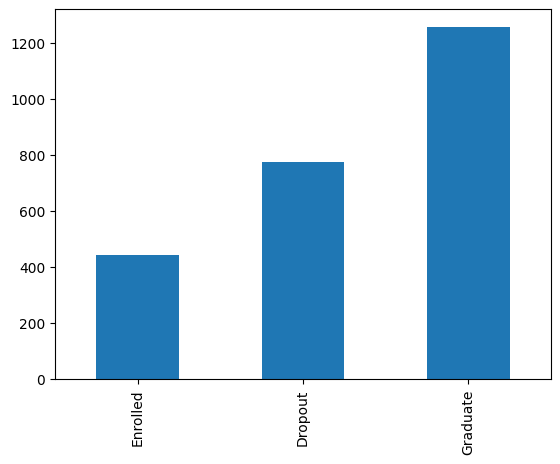

In [6]:
train_set['Category'].value_counts()
train_set.Category.value_counts().sort_values().plot(kind = 'bar')

In [7]:
one_hot_encoded_target = pd.get_dummies(train_set, columns = ['Category'])
one_hot_encoded_target.head()

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category_Dropout,Category_Enrolled,Category_Graduate
0,3222,1,1,1,14,1,1,1,13,28,...,7,6,14.714286,0,11.1,0.6,2.02,0,0,1
1,2388,1,8,4,9,1,1,1,23,14,...,10,2,12.500000,0,11.1,0.6,2.02,1,0,0
2,1865,1,12,1,17,0,1,1,1,1,...,5,5,12.400000,0,15.5,2.8,-4.06,0,0,1
3,652,1,12,1,12,1,12,1,1,5,...,11,7,12.614286,0,12.7,3.7,-1.70,0,0,1
4,4220,1,1,1,14,1,1,1,19,28,...,5,0,0.000000,0,9.4,-0.8,-3.12,1,0,0


Text(0.5, 1.0, 'Correlation heatmap')

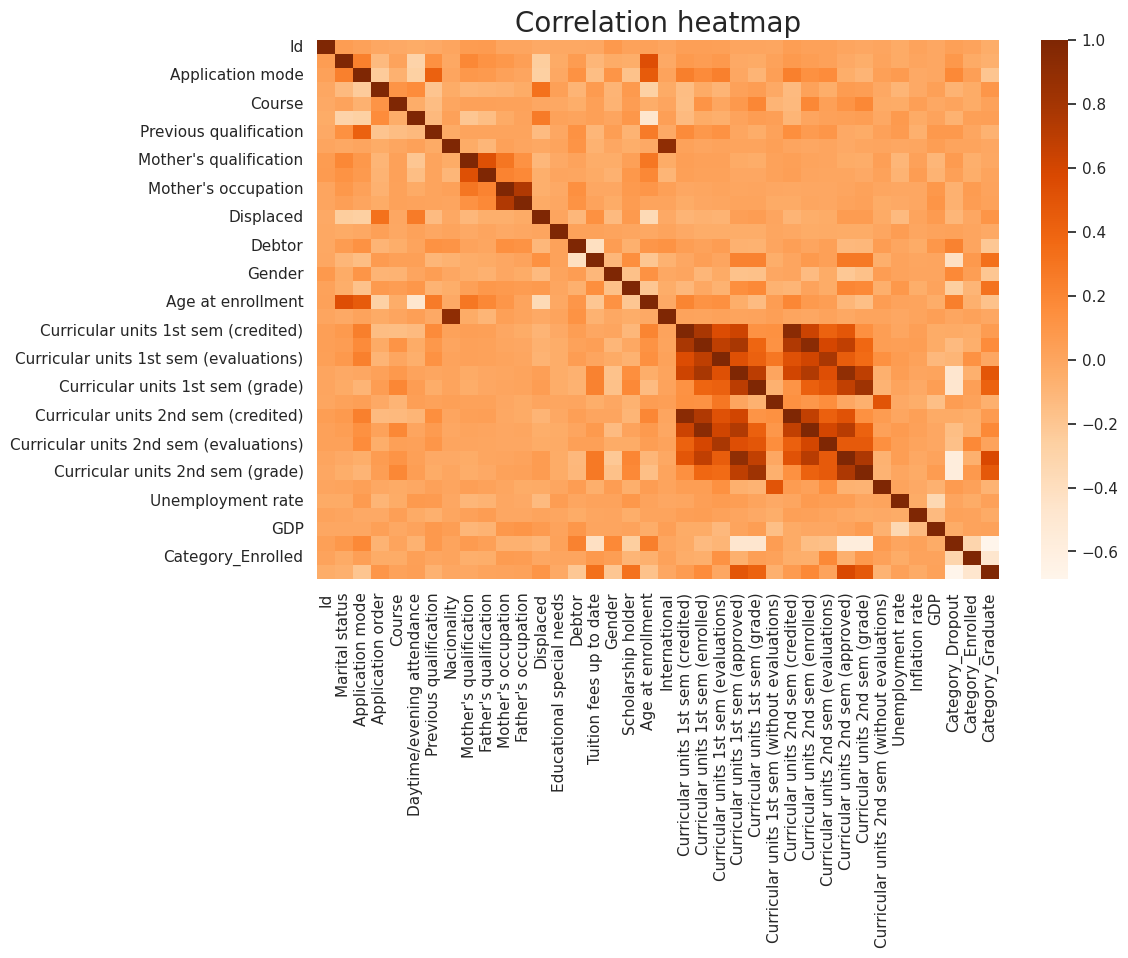

In [8]:
sns.set(rc={'figure.figsize':(11,7)})

heatmap = sns.heatmap(one_hot_encoded_target.corr(), cmap="Oranges")
heatmap.axes.set_title("Correlation heatmap", fontsize=20)

----

# Feature engineering

In [31]:
clean_train_set = train_set[['Age at enrollment', 'Scholarship holder','Tuition fees up to date']]
clean_train_set

,Age at enrollment,Scholarship holder,Tuition fees up to date
0,20,1,1
1,18,1,1
2,26,0,1
3,24,0,1
4,22,0,1
...,...,...,...
2471,20,0,1
2472,22,1,1
2473,49,0,0
2474,18,1,1


In [32]:
clean_validation_set = validation_set[['Age at enrollment', 'Scholarship holder', 'Tuition fees up to date']]
clean_validation_set

,Age at enrollment,Scholarship holder,Tuition fees up to date
0,30,1,1
1,18,0,1
2,18,1,1
3,19,0,1
4,27,0,1
...,...,...,...
1323,21,0,1
1324,21,1,1
1325,22,0,1
1326,21,0,1


In [33]:
clean_test_set = test_set[['Age at enrollment', 'Scholarship holder', 'Tuition fees up to date']]
clean_test_set

,Age at enrollment,Scholarship holder,Tuition fees up to date
0,25,0,0
1,18,1,1
2,20,1,1
3,47,0,1
4,21,0,1
...,...,...,...
615,19,0,1
616,20,0,1
617,32,0,0
618,20,0,1


----

# Oversampling

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(clean_train_set, train_set['Category'])
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

----

# Model trainig and prediction

{'Dropout': 1258, 'Enrolled': 1258, 'Graduate': 1258}

In [17]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

#X = clean_train_set
#y = train_set['Category']

# fit the model on the whole dataset
model.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [22]:
model.score(X, y)

0.5188129305776364

In [21]:
# predict the class label on the validation set
prediction = model.predict(clean_validation_set)

In [23]:
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{'Dropout': 333, 'Enrolled': 702, 'Graduate': 293}

In [27]:
confusion = confusion_matrix(validation_set['Category'], prediction)
confusion

array([[235, 179,  27],
       [ 35, 171,  39],
       [ 63, 352, 227]])

In [30]:
print(classification_report(validation_set['Category'], prediction, target_names=['Dropout', 'Enrolled', 'Graduate']))

              precision    recall  f1-score   support

     Dropout       0.71      0.53      0.61       441
    Enrolled       0.24      0.70      0.36       245
    Graduate       0.77      0.35      0.49       642

    accuracy                           0.48      1328
   macro avg       0.57      0.53      0.48      1328
weighted avg       0.65      0.48      0.50      1328



In [ ]:
# predict final classification on the test set
prediction = model.predict(clean_validation_set)

----

# Saving the results to csv

In [60]:
df = pd.DataFrame({'Category': prediction})
df.head()

,Category
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Graduate


In [61]:
test_set_id = test_set[['Id']]
test_set_id.head()

,Id
0,3557
1,1980
2,1112
3,2914
4,2745


In [65]:
final_df = pd.merge(test_set_id, df, how='left', left_index=True, right_index=True)
final_df

,Id,Category
0,3557,Graduate
1,1980,Graduate
2,1112,Graduate
3,2914,Dropout
4,2745,Graduate
...,...,...
615,335,Graduate
616,1639,Graduate
617,1381,Dropout
618,2455,Graduate


In [66]:
final_df.to_csv('prediction.csv', index=False)

---

# Results bechmark
- multinomial logistic regession, features 'Age' and 'Scholarship'. Score : 0.5642
- multinomial logistic regession, features 'Age' and 'Scholarship'. SMOTE. Score : 0.4888
- multinomial logistic regession, features 'Age', 'Scholarship', 'Tuition fees' . SMOTE. 0.5188
